# Combined Graphs

## Read Data

### Read results for > 7 day LOS prediction

In [1]:
import os
import pandas as pd


sevenDayPredsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/results/preds_los_gt_seven_days.csv')
sevenDayPredsDf

,person_id,visit_occurrence_id,preds
0,319,3142123,0.001758
1,2473,237159,0.000323
2,2738,2692762,0.020937
3,2839,163173,0.000308
4,3071,3103539,0.065990
...,...,...,...
5910,27215486,2677307,0.000083
5911,27215609,2676127,0.000048
5912,27215873,2791472,0.002493
5913,27215873,2834577,0.001311


### Read results for > 14 day LOS prediction

In [2]:
import os
import pandas as pd


fourteenDayPredsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/results/preds_los_gt_fourteen_days.csv')
fourteenDayPredsDf

,person_id,visit_occurrence_id,preds
0,319,3142123,0.000144
1,2473,237159,0.000031
2,2738,2692762,0.000006
3,2839,163173,0.000087
4,3071,3103539,0.000580
...,...,...,...
5910,27215486,2677307,0.000140
5911,27215609,2676127,0.000047
5912,27215873,2791472,0.000020
5913,27215873,2834577,0.000064


### Read Datamatrix

In [5]:
import os
import pandas as pd


datamatrixTestDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_test.csv''')
datamatrixTestDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last,patientunitstayid,unitdischargeoffset,los_gt_seven_days,los_gt_fourteen_days
0,2725751,2782335,2014-08-25,2014-08-15,0,90.214594,68.948400,136.170819,24.912409,97.525547,...,28.5,19.70,15.3,161.0,30.0,5.798,2782335,15078,True,False
1,6231092,616990,2015-09-07,2015-09-02,1,69.473868,52.874564,95.184669,19.428070,102.072917,...,33.4,27.00,20.6,108.0,31.0,15.000,616990,11040,True,False
2,6157973,604224,2015-02-18,2015-02-18,0,81.527872,61.225452,120.516029,18.429078,92.574468,...,30.0,34.70,15.8,78.0,22.0,11.000,604224,4846,False,False
3,2777864,2835449,2014-07-25,2014-07-22,0,104.175874,77.282021,156.803677,15.936306,89.537975,...,26.2,4.40,24.7,100.0,26.0,8.000,2835449,5107,False,False
4,851428,1031164,2014-09-16,2014-09-16,0,89.836084,66.964889,133.320049,15.630901,88.523605,...,27.5,42.60,15.0,134.0,28.0,19.000,1031164,3485,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11243,474572,409951,2015-01-28,2015-01-26,0,72.613289,53.050845,115.781664,21.565836,79.480427,...,32.0,11.90,12.9,112.0,21.0,9.390,409951,10594,True,False
11244,484727,342637,2015-01-07,2015-01-05,0,80.208481,54.950530,124.296820,17.069444,58.142361,...,27.0,6.90,17.0,88.0,17.0,13.371,342637,16212,True,False
11245,2749914,2673191,2015-03-07,2015-03-01,0,91.711615,67.543143,139.061264,25.012987,90.568376,...,28.9,6.60,13.6,77.0,28.0,9.700,2673191,9797,False,False
11246,1044017,1128302,2015-09-03,2015-08-23,0,55.622743,40.307552,92.036643,23.583333,102.555556,...,30.3,7.47,14.8,107.0,30.0,12.234,1128302,26465,True,True


### Merge all the files

In [6]:
resultsDf = datamatrixTestDf[['person_id', 'visit_occurrence_id', 'los_gt_seven_days', 'los_gt_fourteen_days']].drop_duplicates()\
    .merge(sevenDayPredsDf.add_suffix('_seven'), left_on=['person_id', 'visit_occurrence_id'], right_on=['person_id_seven', 'visit_occurrence_id_seven'])\
            .drop(columns=['person_id_seven', 'visit_occurrence_id_seven'])\
                .merge(fourteenDayPredsDf.add_suffix('_fourteen'), left_on=['person_id', 'visit_occurrence_id'], right_on=['person_id_fourteen', 'visit_occurrence_id_fourteen'])\
                    .drop(columns=['person_id_fourteen', 'visit_occurrence_id_fourteen'])
resultsDf

,person_id,visit_occurrence_id,los_gt_seven_days,los_gt_fourteen_days,preds_seven,preds_fourteen
0,2725751,2782335,True,False,0.071781,0.000049
1,6231092,616990,True,False,0.007075,0.000592
2,6157973,604224,False,False,0.000129,0.000007
3,2777864,2835449,False,False,0.003583,0.000023
4,851428,1031164,False,False,0.001084,0.001282
...,...,...,...,...,...,...
5910,715513,962287,False,False,0.001919,0.000005
5911,18103161,1739977,False,False,0.000564,0.000013
5912,2743918,2876739,False,False,0.000580,0.000003
5913,829092,987619,False,False,0.000200,0.000002


In [19]:
resultsDf['los_gt_seven_days'] = [1 if val else 0 for val in resultsDf.los_gt_seven_days]
resultsDf['los_gt_fourteen_days'] = [1 if val else 0 for val in resultsDf.los_gt_fourteen_days]
resultsDf

,person_id,visit_occurrence_id,los_gt_seven_days,los_gt_fourteen_days,preds_seven,preds_fourteen
0,2725751,2782335,1,0,0.071781,0.000049
1,6231092,616990,1,0,0.007075,0.000592
2,6157973,604224,0,0,0.000129,0.000007
3,2777864,2835449,0,0,0.003583,0.000023
4,851428,1031164,0,0,0.001084,0.001282
...,...,...,...,...,...,...
5910,715513,962287,0,0,0.001919,0.000005
5911,18103161,1739977,0,0,0.000564,0.000013
5912,2743918,2876739,0,0,0.000580,0.000003
5913,829092,987619,0,0,0.000200,0.000002


## Combined ROC curve

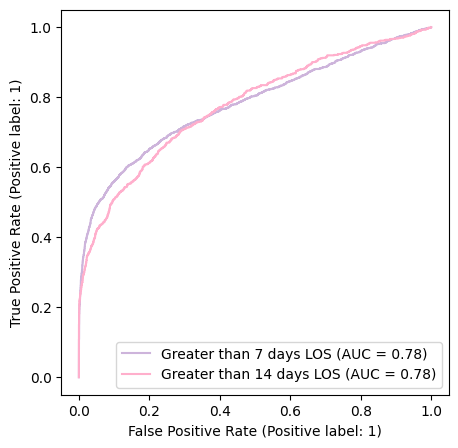

In [22]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(5, 5))

fpr, tpr, _  = roc_curve(resultsDf.los_gt_seven_days, resultsDf.preds_seven)
display = RocCurveDisplay.from_predictions(resultsDf.los_gt_seven_days, resultsDf.preds_seven, name='Greater than 7 days LOS', ax=ax, color='#cdb4db')

fpr, tpr, _  = roc_curve(resultsDf.los_gt_fourteen_days, resultsDf.preds_fourteen)
display = RocCurveDisplay.from_predictions(resultsDf.los_gt_fourteen_days, resultsDf.preds_fourteen, name='Greater than 14 days LOS', ax=ax, color='#ffafcc')
